In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

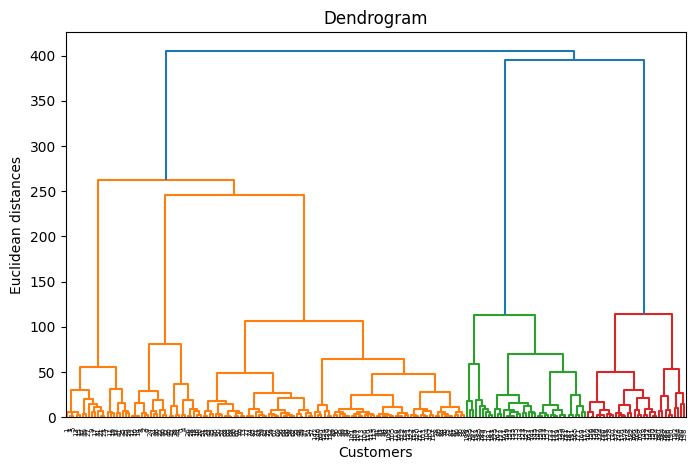

In [4]:
# Using the dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(8, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [5]:
# ---- Silhouette analysis ----
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [6]:
print("Silhouette Scores for different cluster numbers:")
for n in range(2, 11):  # silhouette needs at least 2 clusters
    hc_temp = AgglomerativeClustering(n_clusters=n, metric='euclidean', linkage='ward')
    labels_temp = hc_temp.fit_predict(X)
    score = silhouette_score(X, labels_temp)
    print(f"Clusters: {n}, Silhouette Score: {score:.4f}")

Silhouette Scores for different cluster numbers:
Clusters: 2, Silhouette Score: 0.3671
Clusters: 3, Silhouette Score: 0.4618
Clusters: 4, Silhouette Score: 0.4917
Clusters: 5, Silhouette Score: 0.5530
Clusters: 6, Silhouette Score: 0.5380
Clusters: 7, Silhouette Score: 0.5199
Clusters: 8, Silhouette Score: 0.4326
Clusters: 9, Silhouette Score: 0.4389
Clusters: 10, Silhouette Score: 0.4343


In [7]:
# ---- Best number of clusters (example: choose 5 manually or from silhouette score) ----
n_clusters = 5
hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

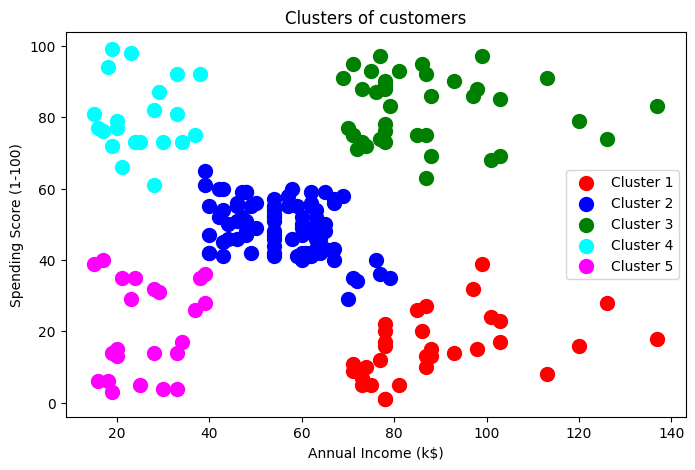

In [8]:
# Visualising the clusters
plt.figure(figsize=(8, 5))
colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'orange', 'purple', 'brown', 'pink', 'gray']
for cluster in range(n_clusters):
    plt.scatter(X[y_hc == cluster, 0], X[y_hc == cluster, 1],
                s=100, c=colors[cluster], label=f'Cluster {cluster+1}')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()